In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import sklearn.model_selection

In [6]:
import sklearn.linear_model

In [7]:
from sklearn import metrics

In [8]:
raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                usecols=[2,3,5,7],
                header=None,
                names=['edible', 'surf color', 'odor', 'color'])

In [9]:
x = raw['edible'].values

In [10]:
y = raw['surf color'].values

In [11]:
z = raw['odor'].values

In [12]:
h = raw['color'].values

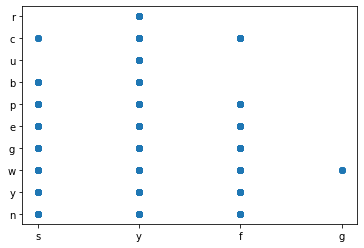

In [13]:
plt.scatter(x,y) # Edible vs Surfance Color

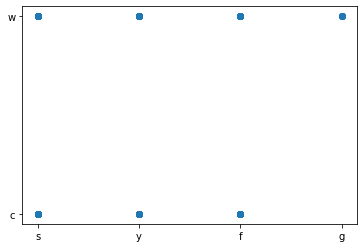

In [14]:
plt.scatter(x,h) # Edible vs Color

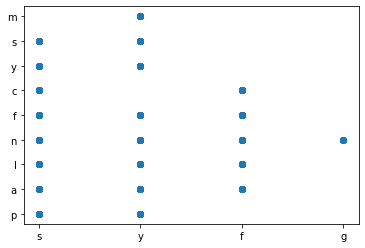

In [15]:
plt.scatter(x,z) # Edible vs Odor

## Exploratory Conclusion: Graphical

Reviewing the graphical representation of the data, I find that of all the different selections, color is the least correlated data point with edibility. Odor and surface color are strongly correlated with edibility. This tells us that odor and surface color are decent predictors of edibility. This analysis is only based on our graphical interpretation of the data. It isn't conclusive.

In [16]:
raw.replace(to_replace={'edible':{'s':0,'y':1,'f':2,'g':3}}, inplace = True)

In [17]:
raw.replace(to_replace={'surf color':{'n':0,'y':1,'w':2,'g':3,'b':4,'c':5,'e':6,'p':7,'r':8,'u':9}}, inplace = True)

In [18]:
raw.replace(to_replace={'odor':{'p':10,'a':11,'l':12,'n':13,'y':14,'e':15,'c':16,'f':17,'m':18,'s':19}}, inplace = True)

In [19]:
raw.replace(to_replace={'color':{'c':20,'w':21}}, inplace = True)

In [20]:
series_scolor = pd.Series(raw['surf color'])

In [21]:
series_odor = pd.Series(raw['odor'])

In [22]:
series_color = pd.Series(raw['color'])

In [23]:
data = pd.concat([raw['edible'],
                  pd.get_dummies(series_scolor),
                  pd.get_dummies(series_odor),
                  pd.get_dummies(series_color)], axis=1)

In [24]:
x = data.iloc[:,20:23].values # Color

In [25]:
y = data.iloc[:,:1].values # Edibility

In [26]:
x_t, x_tset, y_t, y_tset = sklearn.model_selection.train_test_split(x,y,random_state=1)

In [27]:
regression = sklearn.linear_model.LinearRegression()

In [28]:
regression.fit(x_t,y_t)

LinearRegression()

In [29]:
pred_result = regression.predict(x_tset)

In [30]:
np.sqrt(metrics.mean_squared_error(y_tset, pred_result))

0.7819311666526902

In [31]:
x = data.iloc[:,1:12].values # Surface Color

In [32]:
y = data.iloc[:,:1].values # Edibility

In [33]:
x_t, x_tset, y_t, y_tset = sklearn.model_selection.train_test_split(x,y,random_state=1)

In [34]:
regression = sklearn.linear_model.LinearRegression()

In [35]:
regression.fit(x_t,y_t)

LinearRegression()

In [36]:
pred_result = regression.predict(x_tset)

In [37]:
np.sqrt(metrics.mean_squared_error(y_tset, pred_result))

0.7382457707754947

In [38]:
x = data.iloc[:,13:21].values # Odor

In [39]:
y = data.iloc[:,:1].values # Edibility

In [40]:
x_t, x_tset, y_t, y_tset = sklearn.model_selection.train_test_split(x,y,random_state=1)

In [41]:
regression = sklearn.linear_model.LinearRegression()

In [42]:
regression.fit(x_t,y_t)

LinearRegression()

In [43]:
pred_result = regression.predict(x_tset)

In [44]:
np.sqrt(metrics.mean_squared_error(y_tset, pred_result))

0.7315776726854442

## Final Conclusion

Based on our graphical and numerical analyses, we find that odor (and surface color) is/are excellent predictors of edibility. In the first case, odor and surface color indicated strong correlation with edibility; this is a good sign for predictability, however it isn't conclusive (as indicated above). In the second case, odor has the lowest predictability error among the three; this, coupled with the graphical analysis, is strong evidence that odor is the best predictor of edibility of the three.